<a href="https://colab.research.google.com/github/Aboelsaood23/Aboelsaood23/blob/main/specilaization_2_Course_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **week_1**

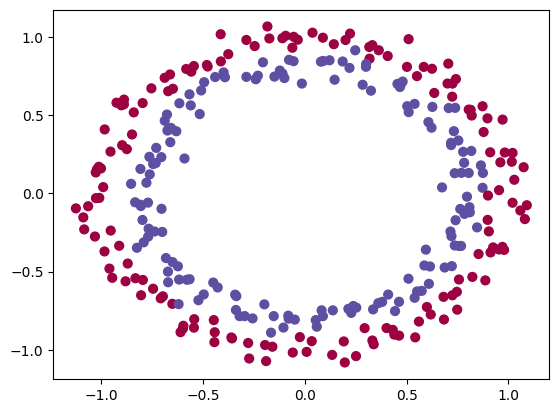

In [51]:
#you will see how different initializations lead to different results.
#well chosen of gradiant descent can lead to :
#1 Speed up the convergence of gradient descent
#2 Increase the odds of gradient descent converging to a lower training (and generalization) error

import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets

#define function to load datasets
def load_dataset():
  np.random.seed(1)
  train_X, train_Y = sklearn.datasets.make_circles(n_samples=300, noise=.05)
  np.random.seed(2)
  test_X, test_Y = sklearn.datasets.make_circles(n_samples=100, noise=.05)
  # Visualize the data
  plt.scatter(train_X[:, 0], train_X[:, 1], c=train_Y, s=40, cmap=plt.cm.Spectral);
  train_X = train_X.T
  train_Y = train_Y.reshape((1, train_Y.shape[0]))
  test_X = test_X.T
  test_Y = test_Y.reshape((1, test_Y.shape[0]))
  return train_X, train_Y, test_X, test_Y

#call this function to load data
train_x,train_y,test_x,test_y =load_dataset()

In [52]:
# Neural Network model
# will use a 3-layer neural network
# we will use three initialization methodes
#1 zeros intialization,2 random intialization ,3 he initializations

#but first we need to build the model as previous course, three layers model  "this is fixed model not like the previous one where you can set any number of layer"
#we wiil build helper methodes (sigmoid, relu),forwrd porpagation,backword propagation, compute loss and update parameters
# we need predict function also
# we will need decision boundary functions too
def sigmoid(x):
  s =1/(1+np.exp(-x))
  return s

def relu(x):
  s =np.maximum(0,x)
  return s

def forward_propagation(x,parameters):
  w1 =parameters["w1"]
  b1 =parameters["b1"]
  w2 =parameters["w2"]
  b2 =parameters["b2"]
  w3 =parameters["w3"]
  b3 =parameters["b3"]

  z1 =np.dot(w1,x)+b1
  a1 =relu(z1)
  z2 =np.dot(w2,a1)+b2
  a2 =relu(z2)
  z3 =np.dot(w3,a2)+b3
  a3 =sigmoid(z3)
  cache =(z1,a1,w1,b1,z2,a2,w2,b2,z3,a3,w3,b3)
  return a3,cache

def backward_propagation(x,y,cache):
  m =x.shape[1]
  (z1,a1,w1,b1,z2,a2,w2,b2,z3,a3,w3,b3)=cache
  dz3 =1./m*(a3-y)
  dw3 =np.dot(dz3,a2.T)
  db3 =np.sum(dz3,axis=1,keepdims=True)

  da2 =np.dot(w3.T,dz3)
  dz2 =np.multiply(da2,np.int64(a2>0))
  dw2 =np.dot(dz2,a1.T)
  db2 =np.sum(dz2,axis =1,keepdims =True)

  da1 =np.dot(w2.T,dz2)
  dz1 =np.multiply(da1,np.int64(a1>0))
  dw1 =np.dot(dz1,x.T)
  db1 =np.sum(dz1,axis =1,keepdims=True)
  grads ={"dz3":dz3,"dw3":dw3,"db3":db3,
          "da2":da2,"dz2":dz2,"dw2":dw2,"db2":db2,
          "da1":da1,"dz1":dz1,"dw1":dw1,"db1":db1}
  return grads

def update_parameters(parameters,grads,learning_rate):
  L =len(parameters)//2
  for k in range(L):
    parameters["w"+str(k+1)] =parameters["w"+str(k+1)]- learning_rate * grads["dw"+str(k+1)]
    parameters["b"+str(k+1)] =parameters["b"+str(k+1)]- learning_rate * grads["db"+str(k+1)]

  return parameters

def compute_loss(a3,y):
  m =y.shape[1]
  logprobs = np.multiply(-np.log(a3),y)+np.multiply(-np.log(1-a3),1-y)
  loss =1./m *np.nansum(logprobs)
  return loss


#now define full model
def model (x,y,learning_rate =0.01,num_iterations =15000,print_cost =True,initialization ="he"):
  grads ={}
  costs =[]
  m =x.shape[1]
  layers_dims =[x.shape[0],10,5,1]
  if initialization =="zeros":
    parameters =initialize_parameters_zeros(layers_dims) # these functions will be defined later
  elif initialization =="random": # this initialize the weights to large random values
    parameters =initialize_parameters_random(layers_dims)
  elif initialization =="he": # this initialize the weights to random values scaled according a paper by He
    parameters =initialize_parameters_he(layers_dims)
  for i in range(0,num_iterations):
    a3,cache =forward_propagation(x,parameters)
    cost =compute_loss(a3,y)
    grads =backward_propagation(x,y,cache)
    parameters =update_parameters(parameters,grads,learning_rate)
    if print_cost and i % 1000==0:
      print("cost after iterations {}: {}".format(i,cost))
      costs.append(cost)

  plt.plot(costs)
  plt.ylabel('cost')
  plt.xlabel('iterations per hunderd')
  plt.title('learning rate ='+str(learning_rate))
  plt.show()

  return parameters

# predict function
def predict(x,y,parameters):
  m =x.shape[1]
  p =np.zeros((1,m),dtype =int)
  a3,caches =forward_propagation(x,parameters)
  for  i in range(0,a3.shape[1]):
    if a3[0,i]>0.5 :
      p[0,i]=1
    else :
      p[0,i] =0
  print("accuracy : "+str(np.mean((p[0,:]==y[0,:]))))
  return p

#define decision boundary functions
def plot_decision_boundary(model,x,y):
  x_min,x_max =x[0,:].min() -1,x[0,:].max()+1
  y_min,y_max =x[1,:].min() -1,x[1,:].max()+1
  h =0.01
  xx,yy =np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
  z =model(np.c_[xx.ravel(),yy.ravel()])
  z =z.reshape(xx.shape)
  plt.contourf(xx,yy,z,cmap=plt.cm.Spectral)
  plt.ylabel('x2')
  plt.xlabel('x1')
  plt.scatter(x[0,:],x[1,:],c=y,cmap=plt.cm.Spectral)
  plt.show()

def predict_dec(parameters,x):
  a3,cache =forward_propagation(x,parameters)
  predictions =(a3>0.5)
  return predictions


# there is two types of parameters to initialize on neural networks
#1 weights metrices (w1,w2,w3,...)
#2 bise vectors (b1,b2,b3....)

#


w1 =  [[0. 0. 0.]
 [0. 0. 0.]]
w2=  [[0. 0.]]
b1 [[0.]
 [0.]]
b2 [[0.]]
cost after iterations 0: 0.6931471805599453
cost after iterations 1000: 0.6931471805599453
cost after iterations 2000: 0.6931471805599453
cost after iterations 3000: 0.6931471805599453
cost after iterations 4000: 0.6931471805599453
cost after iterations 5000: 0.6931471805599453
cost after iterations 6000: 0.6931471805599453
cost after iterations 7000: 0.6931471805599453
cost after iterations 8000: 0.6931471805599453
cost after iterations 9000: 0.6931471805599453
cost after iterations 10000: 0.6931471805599455
cost after iterations 11000: 0.6931471805599453
cost after iterations 12000: 0.6931471805599453
cost after iterations 13000: 0.6931471805599453
cost after iterations 14000: 0.6931471805599453


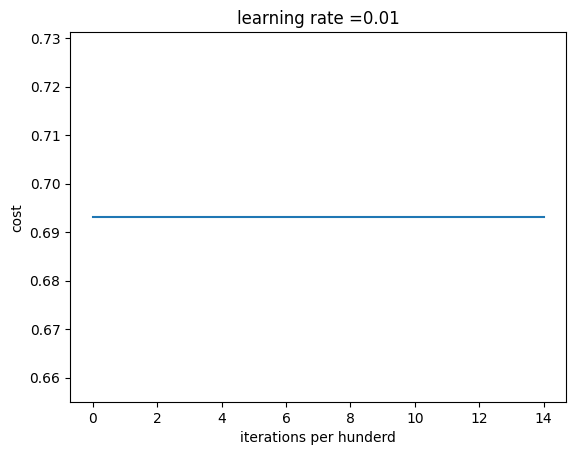

on training set
accuracy : 0.5
on test set
accuracy : 0.5
predictions_train = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0]]
predictions_train = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


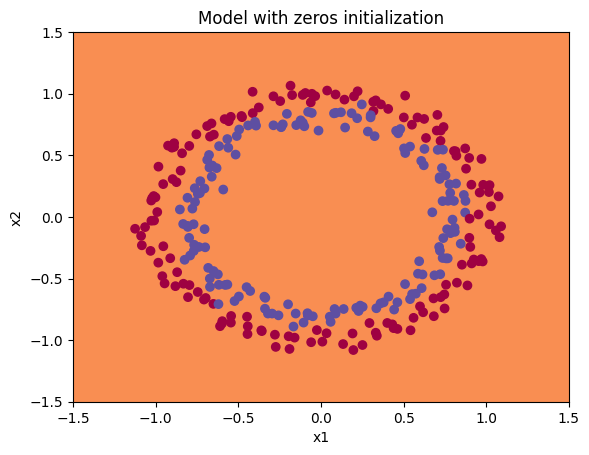

In [53]:
# initialize parameters to zeros
def initialize_parameters_zeros(layers_dims):
  parameters ={}
  L =len(layers_dims)
  for l in range(1,L):
    parameters['w'+str(l)] =np.zeros((layers_dims[l],layers_dims[l-1]))
    parameters['b'+str(l)] =np.zeros((layers_dims[l],1))
  return parameters

#let's check this function
parameters =initialize_parameters_zeros([3,2,1])
print("w1 = ",parameters["w1"])
print("w2= ", parameters["w2"])
print("b1",parameters["b1"])
print("b2",parameters["b2"])

#check model with this initialized values
parameters = model(train_x,train_y,initialization ="zeros")
print ("on training set")
predictions_train =predict(train_x,train_y,parameters)
print("on test set")
predictions_test =predict(test_x,test_y,parameters)

#The performance is really bad, and the cost does not really decrease, and the algorithm performs no better than random guessing.

#let's check results of predicted values
print("predictions_train =",str(predictions_train))
print("predictions_train =",str(predictions_test))


plt.title("Model with zeros initialization")
axes =plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x :predict_dec(parameters,x.T),train_x,train_y)
#The model is predicting 0 for every example.
#In general, initializing all the weights to zero results in the network failing to break symmetry. This means that every neuron in each layer will learn the same thing
#and you might as well be training a neural network with n(l) =1 for every layer, and the network is no more powerful than a linear classifier such as logistic regression.


w1 =  [[ 17.88628473   4.36509851   0.96497468]
 [-18.63492703  -2.77388203  -3.54758979]]
w2 =  [[-0.82741481 -6.27000677]]
b1 =  [[0.]
 [0.]]
b2 =  [[0.]]
cost after iterations 0: inf


<ipython-input-52-ee9864d24c1a>:66: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),y)+np.multiply(-np.log(1-a3),1-y)
<ipython-input-52-ee9864d24c1a>:66: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),y)+np.multiply(-np.log(1-a3),1-y)


cost after iterations 1000: 0.6247924745506072
cost after iterations 2000: 0.5980258056061102
cost after iterations 3000: 0.5637539062842213
cost after iterations 4000: 0.5501256393526495
cost after iterations 5000: 0.5443826306793814
cost after iterations 6000: 0.5373895855049121
cost after iterations 7000: 0.47157999220550006
cost after iterations 8000: 0.39770475516243037
cost after iterations 9000: 0.3934560146692851
cost after iterations 10000: 0.3920227137490125
cost after iterations 11000: 0.38913700035966736
cost after iterations 12000: 0.3861358766546214
cost after iterations 13000: 0.38497629552893475
cost after iterations 14000: 0.38276694641706693


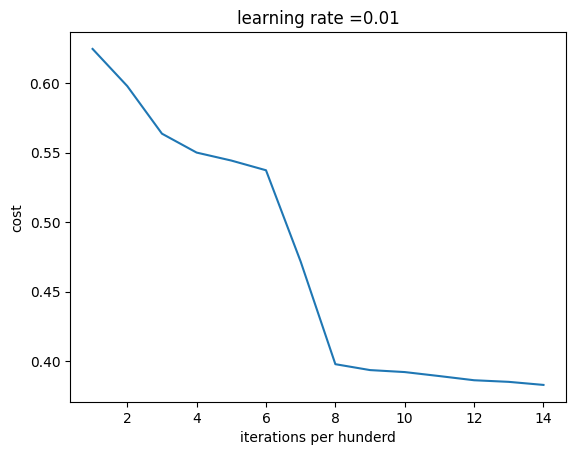

on the training set :
accuracy : 0.83
on test set : 
accuracy : 0.86
[[1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1
  1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0
  0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0
  1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0
  0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1
  1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1
  0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1
  1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1
  1 1 1 1 0 0 0 1 1 1 1 0]]
[[1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1
  0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0
  1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0]]


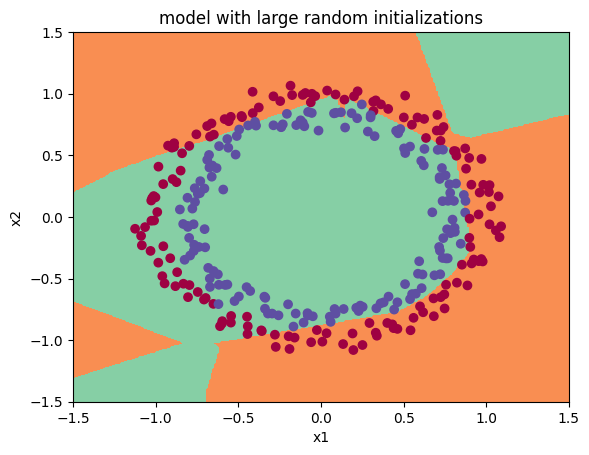

In [54]:
#Random initialization
#to break symmetyr let's iniitialize weights randomly , each nueron can leanr a difernet functions of it's inputs

def initialize_parameters_random(layers_dims):
  np.random.seed(3)
  parameters ={}
  L =len(layers_dims)
  for l in range(1,L):
    parameters['w'+str(l)] =np.random.randn(layers_dims[l],layers_dims[l-1])*10
    parameters['b'+str(l)] =np.zeros((layers_dims[l],1))
  return parameters

#let's check this functions
parameters =initialize_parameters_random([3,2,1])
print('w1 = ',parameters["w1"])
print('w2 = ',parameters["w2"])
print('b1 = ',parameters["b1"])
print('b2 = ',parameters["b2"])

parameters =model(train_x,train_y,initialization ="random")
print("on the training set :")
predictions_train =predict(train_x,train_y,parameters)
print("on test set : ")
predictions_test =predict(test_x,test_y,parameters)

# it looks like you have broken symmetry, and this gives better results. than before. The model is no longer outputting all 0s

print(predictions_train)
print(predictions_test)

#let's plot decision boundary
plt.title("model with large random initializations")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x : predict_dec(parameters,x.T),train_x,train_y)
#Poor initialization can lead to vanishing/exploding gradients, which also slows down the optimization algorithm.
#If you train this network longer you will see better results, but initializing with overly large random numbers slows down the optimization.

#**In summary**: - Initializing weights to very large random values does not work well. - Hopefully intializing with small random values does better. The important question is: how small should be these random values be? Lets find out in the next part!


w1= [[ 1.78862847  0.43650985]
 [ 0.09649747 -1.8634927 ]
 [-0.2773882  -0.35475898]
 [-0.08274148 -0.62700068]]
w2= [[-0.03098412 -0.33744411 -0.92904268  0.62552248]]
b1= [[0.]
 [0.]
 [0.]
 [0.]]
b2= [[0.]]
cost after iterations 0: 0.8830537463419761
cost after iterations 1000: 0.6879825919728063
cost after iterations 2000: 0.6751286264523371
cost after iterations 3000: 0.6526117768893807
cost after iterations 4000: 0.6082958970572938
cost after iterations 5000: 0.5304944491717495
cost after iterations 6000: 0.4138645817071795
cost after iterations 7000: 0.31178034648444414
cost after iterations 8000: 0.23696215330322565
cost after iterations 9000: 0.18597287209206836
cost after iterations 10000: 0.15015556280371808
cost after iterations 11000: 0.12325079292273551
cost after iterations 12000: 0.09917746546525935
cost after iterations 13000: 0.08457055954024276
cost after iterations 14000: 0.07357895962677363


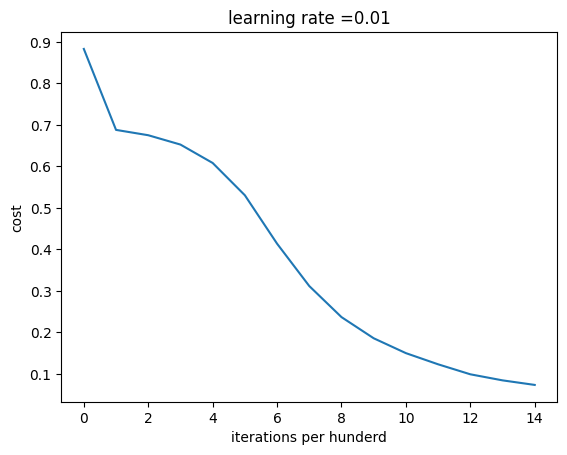

on the train set 
accuracy : 0.9933333333333333
on the test set
accuracy : 0.96


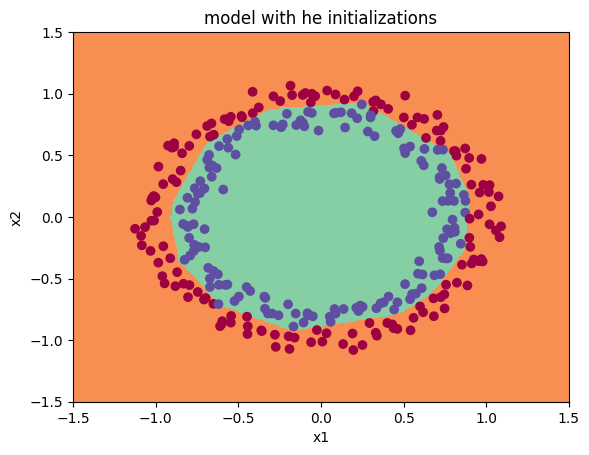

In [66]:
#He initialization
#If you have heard of "Xavier initialization", this is similar except Xavier initialization uses a scaling factor for the weights w[l] sqrt(1./layers_dims[l-1])
#where He initialization would use sqrt(2./layers_dims[l-1]).)

def initialize_parameters_he(layers_dims):
  np.random.seed(3)
  parameters ={}
  L =len(layers_dims)-1
  import math
  for l in range(1,L+1):
    parameters['w' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1])*math.sqrt(2./layers_dims[l-1])
    parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))*math.sqrt(2./layers_dims[l-1])
  return parameters

#let's chechk this function
parameters  =initialize_parameters_he([2,4,1])
print("w1= "+str(parameters["w1"]))
print("w2= "+str(parameters["w2"]))
print("b1= "+str(parameters["b1"]))
print("b2= "+str(parameters["b2"]))

parameters =model(train_x,train_y,initialization ='he')
print("on the train set ")
predictions_train =predict(train_x,train_y,parameters)
print("on the test set")
predictions_test =predict(test_x,test_y,parameters)


#let's visualize our datasets
plt.title("model with he initializations")
axes= plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x :predict_dec(parameters,x.T),train_x,train_y)
